In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import cmasher as cmr

import sys
sys.path.append("..")
from field.cascade import Cascade3D, LagrangianMapping3D, Precision

Copyright (c) 2024 Jeremiah Lübke <jeremiah.luebke@rub.de>,
Frederic Effenberger, Mike Wilbert, Horst Fichtner, Rainer Grauer

Distributed under the MIT License.
 
This is the implementation of the algorithm described in
 > J. Lübke, F. Effenberger, M. Wilbert, H. Fichtner and R. Grauer,
 > Towards Synthetic Magnetic Turbulence with Coherent Structures
 > (2024).

If the software contributes to findings you decide to present or publish,
please be so kind and cite this reference. Thank you!



In [2]:
SEED = 20240115
THREADS = min(os.cpu_count(), 64)

# Continuous Cascade

In [3]:
np.random.seed(SEED)
c = Cascade3D(name="CC", grid_size=256, precision=Precision.DOUBLE, num_threads=THREADS, wisdom_path="../wisdom/")
res = c(number_of_modes=12, correlation_length=0.5, spectral_index=1/3, intermittency_parameter=0.04)
c_div = c.div(out="e").copy()
c_curl = c.curl(out="e").copy()
c_curv = c.curv(out="e").copy()

kbins, k = c.kbins()
S_cc = c.spectrum(kbins)
cbins, c_ = c.kbins(1e-2, 1e3, 101)
c_hist_cc = np.histogram(c_curv.ravel(), cbins, density=True)[0]

initializing FFTW with wisdom from disk (if this step fails: delete wisdom file).
running cascade: CC.
running scale 0.5. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.33371. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.222725. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.148651. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.0992126. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.0662164. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.0441942. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.0294961. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.0196863. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.013139. generating omega, theta, phi. normalizing. wavelet step.
running scale 0.00876923. generating omega, theta, phi. normalizing. wavelet step.
runni

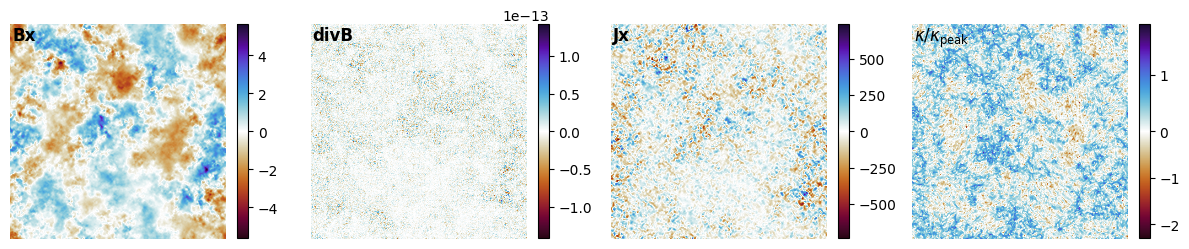

In [4]:
from matplotlib.colors import CenteredNorm, TwoSlopeNorm

def imshow(arr, name, cmap, norm=None):
    im = plt.imshow(arr, cmap=cmap, norm=norm)
    plt.colorbar(im, fraction=0.045, pad=0.05)
    plt.text(0.01, 0.99, name, ha="left", va="top", fontsize="large", fontweight="bold", transform=plt.gca().transAxes)
    plt.axis("off")

plt.figure(figsize=(12, 3))

plt.subplot(141)
imshow(res[0,0], "Bx", "cmr.fusion", CenteredNorm())

plt.subplot(142)
imshow(c_div[0], "divB", "cmr.fusion", CenteredNorm())

plt.subplot(143)
imshow(c_curl[0,0], "Jx", "cmr.fusion", CenteredNorm())

plt.subplot(144)
imshow(np.log10(c_curv[0]/c_[np.argmax(c_hist_cc)]), "$\kappa/\kappa_\mathrm{peak}$", "cmr.fusion", TwoSlopeNorm(vcenter=0))

plt.tight_layout()

# Lagrangian Mapping (self-advection)

In [5]:
np.random.seed(SEED)
c = LagrangianMapping3D(name="LM0", grid_size=256, cfl=0.1, precision=Precision.DOUBLE, num_threads=THREADS, wisdom_path="../wisdom/")
res = c(other=False, number_of_modes=12, correlation_length=0.5, spectral_index=1/3, intermittency_parameter=0.01, lowpass_kwds=dict(k0=256/2, k1=256/2, p0=-0.1))
c_div = c.div(out="e").copy()
c_curl = c.curl(out="e").copy()
c_curv = c.curv(out="e").copy()

kbins, k = c.kbins()
S_lm0 = c.spectrum(kbins)
cbins, c_ = c.kbins(1e-2, 1e3, 101)
c_hist_lm0 = np.histogram(c_curv.ravel(), cbins, density=True)[0]

initializing FFTW with wisdom from disk (if this step fails: delete wisdom file).
running cascade: LM0.


running scale 0.5. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.33371. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.222725. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.148651. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0992126. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0662164. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0441942. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0294961. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0196863. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.013139. generating omega, theta, phi. normalizing

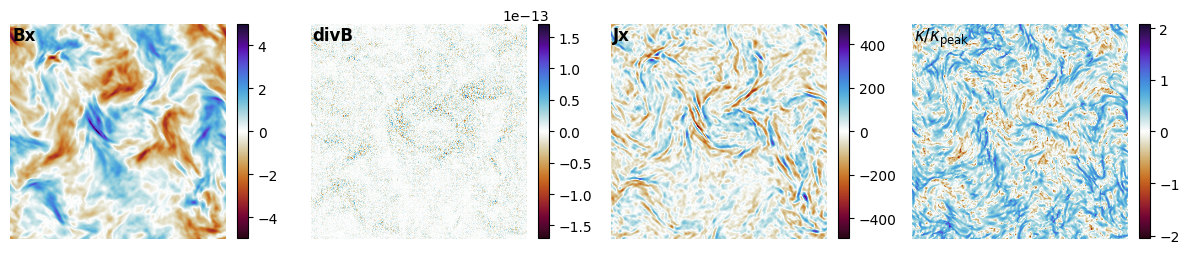

In [6]:
plt.figure(figsize=(12, 3))

plt.subplot(141)
imshow(res[0,0], "Bx", "cmr.fusion", CenteredNorm())

plt.subplot(142)
imshow(c_div[0], "divB", "cmr.fusion", CenteredNorm())

plt.subplot(143)
imshow(c_curl[0,0], "Jx", "cmr.fusion", CenteredNorm())

plt.subplot(144)
imshow(np.log10(c_curv[0]/c_[np.argmax(c_hist_lm0)]), "$\kappa/\kappa_\mathrm{peak}$", "cmr.fusion", TwoSlopeNorm(vcenter=0))

plt.tight_layout()

# Lagrangian Mapping (advecting other)

In [7]:
np.random.seed(SEED)
c = LagrangianMapping3D(name="LM1", grid_size=256, cfl=0.1, precision=Precision.DOUBLE, num_threads=THREADS, wisdom_path="../wisdom/")
res = c(other=True, number_of_modes=12, correlation_length=0.5, spectral_index=1/3, intermittency_parameter=0.01, lowpass_kwds=dict(k0=256/2, k1=256/2, p0=-0.1))
c_div = c.div(out="e").copy()
c_curl = c.curl(out="e").copy()
c_curv = c.curv(out="e").copy()

kbins, k = c.kbins()
S_lm1 = c.spectrum(kbins)
cbins, c_ = c.kbins(1e-2, 1e3, 101)
c_hist_lm1 = np.histogram(c_curv.ravel(), cbins, density=True)[0]

initializing FFTW with wisdom from disk (if this step fails: delete wisdom file).
running cascade: LM1.


running scale 0.5. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.33371. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.222725. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.148651. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0992126. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0662164. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0441942. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0294961. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0196863. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.013139. generating omega, theta, phi. normalizing

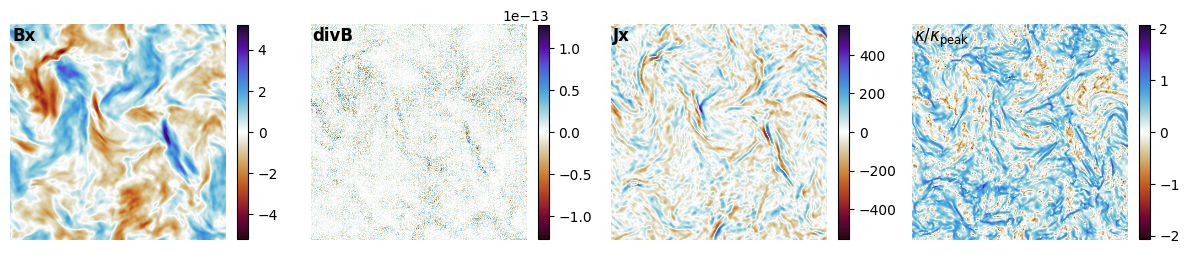

In [8]:
plt.figure(figsize=(12, 3))

plt.subplot(141)
imshow(res[0,0], "Bx", "cmr.fusion", CenteredNorm())

plt.subplot(142)
imshow(c_div[0], "divB", "cmr.fusion", CenteredNorm())

plt.subplot(143)
imshow(c_curl[0,0], "Jx", "cmr.fusion", CenteredNorm())

plt.subplot(144)
imshow(np.log10(c_curv[0]/c_[np.argmax(c_hist_lm1)]), "$\kappa/\kappa_\mathrm{peak}$", "cmr.fusion", TwoSlopeNorm(vcenter=0))

plt.tight_layout()

# Spectra and Fieldline Curvature Distributions

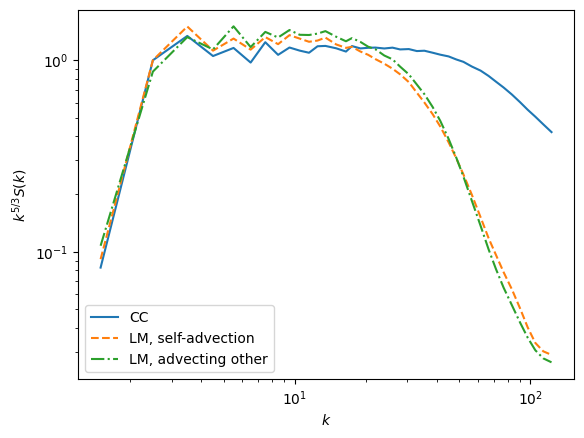

In [9]:
plt.plot(k, k**(5/3)*sum(S_cc)/3, label="CC")
plt.plot(k, k**(5/3)*sum(S_lm0)/3, ls="--", label="LM, self-advection")
plt.plot(k, k**(5/3)*sum(S_lm1)/3, ls="-.", label="LM, advecting other")
plt.loglog()
plt.xlabel("$k$")
plt.ylabel("$k^{5/3}S(k)$")
plt.legend()

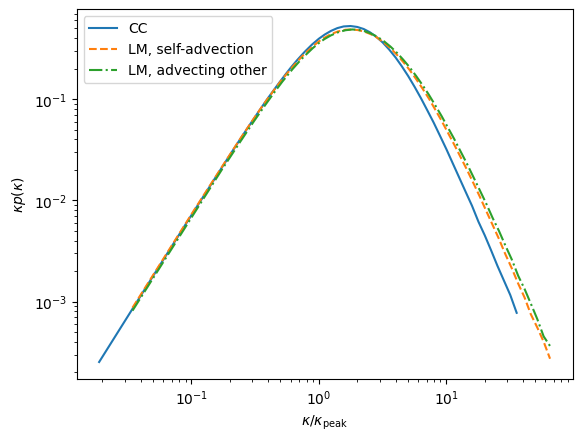

In [10]:
plt.plot(c_/c_[np.argmax(c_hist_cc)], c_*c_hist_cc, label="CC")
plt.plot(c_/c_[np.argmax(c_hist_lm0)], c_*c_hist_lm0, ls="--", label="LM, self-advection")
plt.plot(c_/c_[np.argmax(c_hist_lm1)], c_*c_hist_lm1, ls="-.", label="LM, advecting other")
plt.loglog()
plt.xlabel("$\kappa/\kappa_\mathrm{peak}$")
plt.ylabel("$\kappa p(\kappa)$")
plt.legend()

# Randomizing Phases

In [11]:
np.random.seed(SEED)
c = LagrangianMapping3D(name="LM", grid_size=256, cfl=0.1, precision=Precision.DOUBLE, num_threads=THREADS, wisdom_path="../wisdom/")
res = c(other=False, number_of_modes=12, correlation_length=0.5, spectral_index=1/3, intermittency_parameter=0.02, lowpass_kwds=dict(k0=256/2, k1=256/2, p0=-0.1))
c_curv = c.curv(out="e").copy()

kbins, k = c.kbins()
S_lm = c.spectrum(kbins)
cbins, c_ = c.kbins(1e-2, 1e3, 101)
c_hist_lm = np.histogram(c_curv.ravel(), cbins, density=True)[0]

initializing FFTW with wisdom from disk (if this step fails: delete wisdom file).
running cascade: LM.
running scale 0.5. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.33371. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.222725. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.148651. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0992126. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0662164. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0441942. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0294961. generating omega, theta, phi. normalizing. wavelet step. advecting coordinates.
running scale 0.0196863. generating omega, theta, phi. normalizing.

In [12]:
res = c.randomize_phases()
c_curv = c.curv(out="e").copy()
kbins, k = c.kbins()
S_rp = c.spectrum(kbins)
cbins, c_ = c.kbins(1e-2, 1e3, 101)
c_hist_rp = np.histogram(c_curv.ravel(), cbins, density=True)[0]

randomizing phases.
computing curvature.
computing radial spectra.


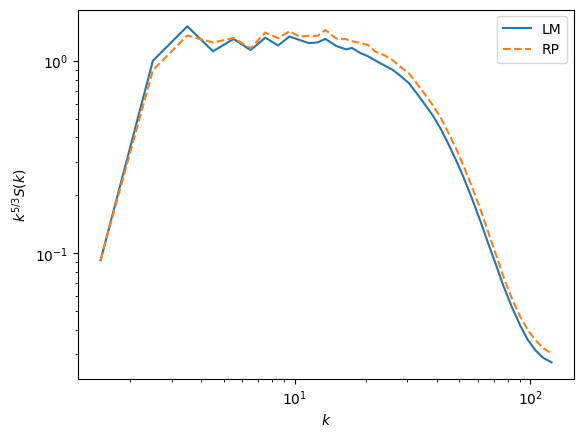

In [13]:
plt.plot(k, k**(5/3)*sum(S_lm)/3, label="LM")
plt.plot(k, k**(5/3)*sum(S_rp)/3, ls="--", label="RP")
plt.loglog()
plt.xlabel("$k$")
plt.ylabel("$k^{5/3}S(k)$")
plt.legend()

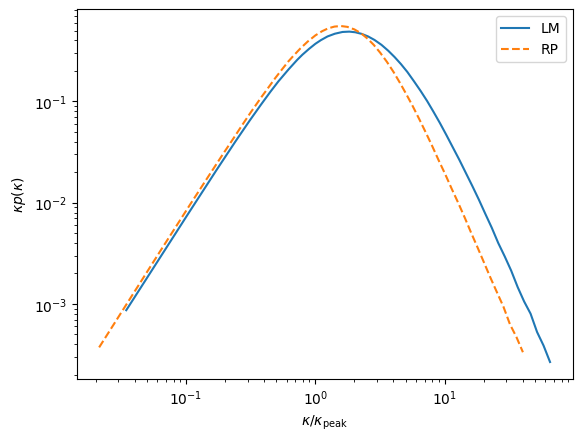

In [14]:
plt.plot(c_/c_[np.argmax(c_hist_lm)], c_*c_hist_lm, label="LM")
plt.plot(c_/c_[np.argmax(c_hist_rp)], c_*c_hist_rp, ls="--", label="RP")
plt.loglog()
plt.xlabel("$\kappa/\kappa_\mathrm{peak}$")
plt.ylabel("$\kappa p(\kappa)$")
plt.legend()